<a href="https://colab.research.google.com/github/latifahnl/modulesection/blob/kmmodule/DomainCV_ImangeProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib as plt

In [ ]:
gray_img = cv2.imread("/content/unequalized.jpg", cv2.IMREAD_GRAYSCALE) 

In [ ]:
print(gray_img)

[[127 145 149 ... 168 167 166]
 [165 152 143 ... 168 169 168]
 [171 145 140 ... 156 154 151]
 ...
 [147 132 134 ... 146 145 144]
 [146 130 132 ... 146 145 144]
 [145 128 130 ... 146 145 144]]


In [ ]:
#Image enchancement menggunakan power law (gamma transformation)

In [ ]:
#range gamma 
# 0 < gamma < tak hingga
gamma = 1000

In [ ]:
gray_img.shape

(683, 1024)

In [ ]:
output_img = np.zeros(gray_img.shape)

In [ ]:
for x,y in np.ndindex(gray_img.shape):
  output_img[x,y] = ((gray_img[x,y]/255)**(1/gamma))*255

In [ ]:
print(output_img)

In [ ]:
from google.colab.patches import cv2_imshow as show

In [ ]:
show(gray_img)

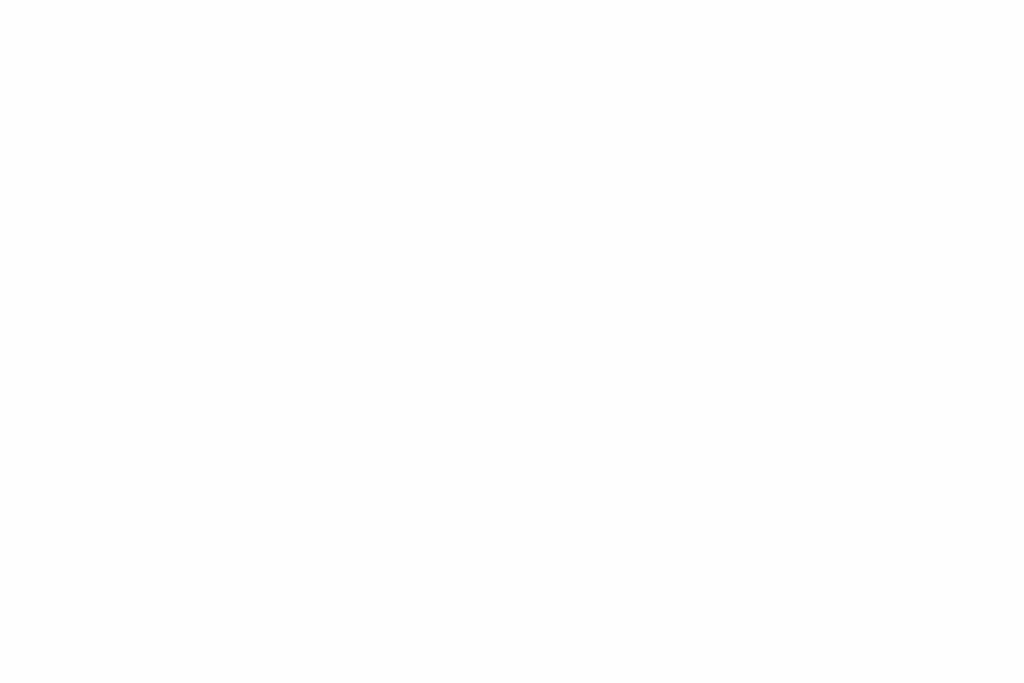

In [ ]:
show(output_img)

In [ ]:
print(output_img[0][0])

254.82230744287608


In [ ]:
# Image enchancement dengan log transformation

import cv2
import numpy as np
import matplotlib as plt
import math

In [ ]:
gray_img = cv2.imread("/content/unequalized.jpg", cv2.IMREAD_GRAYSCALE) 

In [ ]:
# mencari nilai C

In [ ]:
gray_img.max()

208

In [ ]:
c = 255/(math.log(1 + gray_img.max()))

In [ ]:
print(c)

47.73194412278037


In [ ]:
output_img = np.zeros(gray_img.shape)

In [ ]:
for x,y in np.ndindex(gray_img.shape):
  output_img[x,y] = c * math.log(1 + gray_img[x,y])

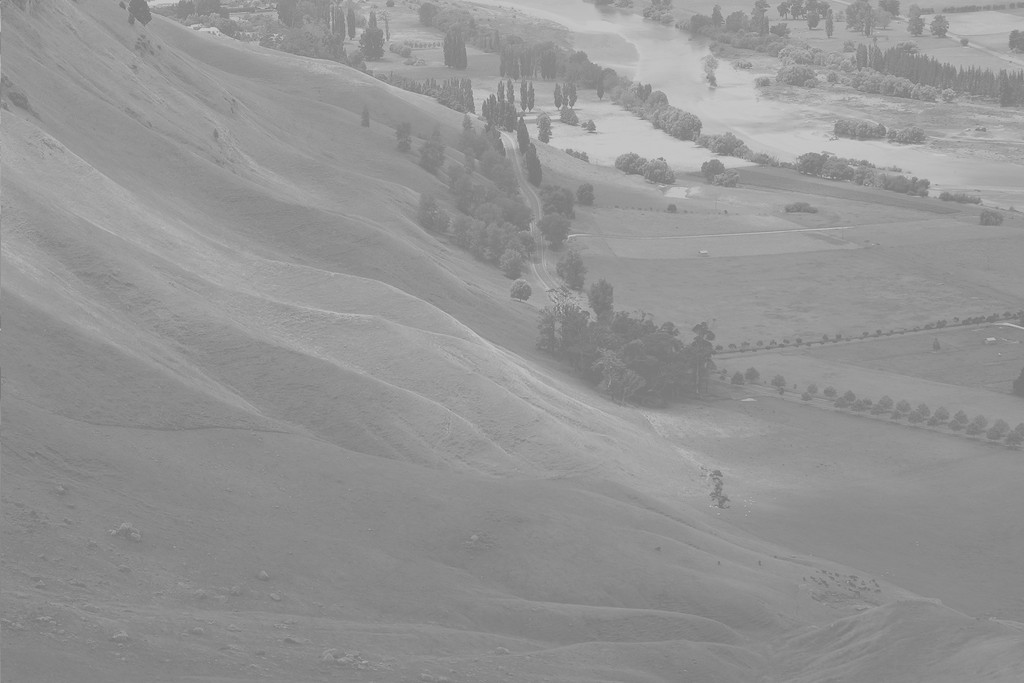

In [ ]:
from google.colab.patches import cv2_imshow as show

show(gray_img)

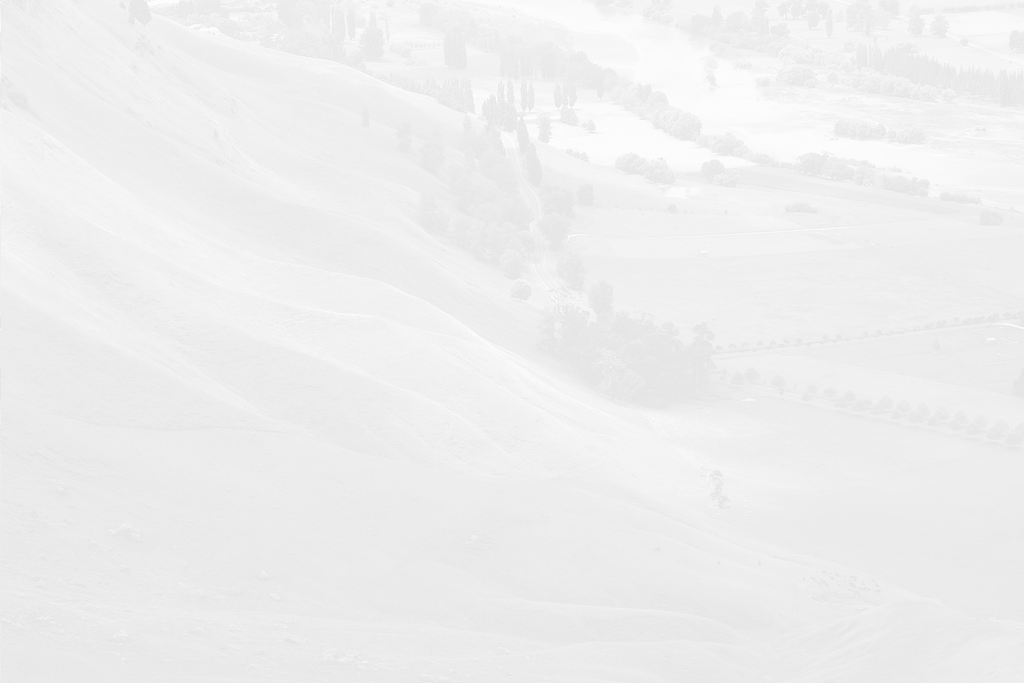

In [ ]:
show(output_img)

In [ ]:
# image enchancement dengan histogram equalization

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gray_img = cv2.imread("/content/unequalized.jpg", cv2.IMREAD_GRAYSCALE) 

In [ ]:
(height, width) = gray_img.shape

In [ ]:
print(height)
print(width)

683
1024


In [ ]:
#Mendapatkan nilai K

k = int(gray_img.max()).bit_length()
print(k)

8


In [ ]:
bin(gray_img.max())

'0b11010000'

In [ ]:
# Menghitung frekuensi pixel yang unique

(unique, counts) = np.unique(gray_img, return_counts = True)

In [ ]:
print(unique)
print(len(unique))

[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208]
95


In [ ]:
print(counts)

[    1     1    12    19    49    95   220   490  1056  1750  2157  2719
  3263  4034  5110  6396  8452 10623 13509 16151 19091 22195 25711 28693
 28332 25766 24366 23564 21782 20377 19843 19782 19442 18857 18455 17909
 17913 17813 18487 17667 15800 14161 12812 11585 10751  9899  9379  8865
  8394  7404  6405  5909  5593  5148  4612  4320  3858  3618  3429  3063
  2650  2211  2047  1860  1693  1483  1361  1293  1152  1236  1297  1519
  1383  1527  1734  1847  1535  1360  1417  1481  1542  1594  2367  2815
  1140   419   129    56    41    18    10    10     6     1     1]


In [ ]:
# Menghitung distribusi kumulatif

cdx = np.zeros(len(counts))
cdx[0] = counts[0]

for i in range(1,len(counts)):
  cdx[i] = cdx[i-1] + counts[i]

print(cdx)

[1.00000e+00 2.00000e+00 1.40000e+01 3.30000e+01 8.20000e+01 1.77000e+02
 3.97000e+02 8.87000e+02 1.94300e+03 3.69300e+03 5.85000e+03 8.56900e+03
 1.18320e+04 1.58660e+04 2.09760e+04 2.73720e+04 3.58240e+04 4.64470e+04
 5.99560e+04 7.61070e+04 9.51980e+04 1.17393e+05 1.43104e+05 1.71797e+05
 2.00129e+05 2.25895e+05 2.50261e+05 2.73825e+05 2.95607e+05 3.15984e+05
 3.35827e+05 3.55609e+05 3.75051e+05 3.93908e+05 4.12363e+05 4.30272e+05
 4.48185e+05 4.65998e+05 4.84485e+05 5.02152e+05 5.17952e+05 5.32113e+05
 5.44925e+05 5.56510e+05 5.67261e+05 5.77160e+05 5.86539e+05 5.95404e+05
 6.03798e+05 6.11202e+05 6.17607e+05 6.23516e+05 6.29109e+05 6.34257e+05
 6.38869e+05 6.43189e+05 6.47047e+05 6.50665e+05 6.54094e+05 6.57157e+05
 6.59807e+05 6.62018e+05 6.64065e+05 6.65925e+05 6.67618e+05 6.69101e+05
 6.70462e+05 6.71755e+05 6.72907e+05 6.74143e+05 6.75440e+05 6.76959e+05
 6.78342e+05 6.79869e+05 6.81603e+05 6.83450e+05 6.84985e+05 6.86345e+05
 6.87762e+05 6.89243e+05 6.90785e+05 6.92379e+05 6.

In [ ]:
#Implementasikan Ko

wh = width * height
dj = (2**k)-1

kx = np.zeros(len(counts))

for i in range(len(counts)):
  kx[i] = round((cdx[i]*dj)/wh)

print(kx)

[  0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   3.   4.   6.
   8.  10.  13.  17.  22.  28.  35.  43.  52.  63.  73.  82.  91. 100.
 108. 115. 122. 130. 137. 144. 150. 157. 163. 170. 177. 183. 189. 194.
 199. 203. 207. 210. 214. 217. 220. 223. 225. 227. 229. 231. 233. 235.
 236. 237. 238. 240. 241. 241. 242. 243. 243. 244. 244. 245. 245. 246.
 246. 247. 247. 248. 249. 249. 250. 250. 251. 251. 252. 252. 253. 254.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]


In [ ]:
#Replace pixel elements

output_img = np.zeros(gray_img.shape)

for x,y in np.ndindex(gray_img.shape):
  output_img[x,y] = kx[int(np.where(unique == gray_img[x,y])[0])]

In [ ]:
from google.colab.patches import cv2_imshow as show

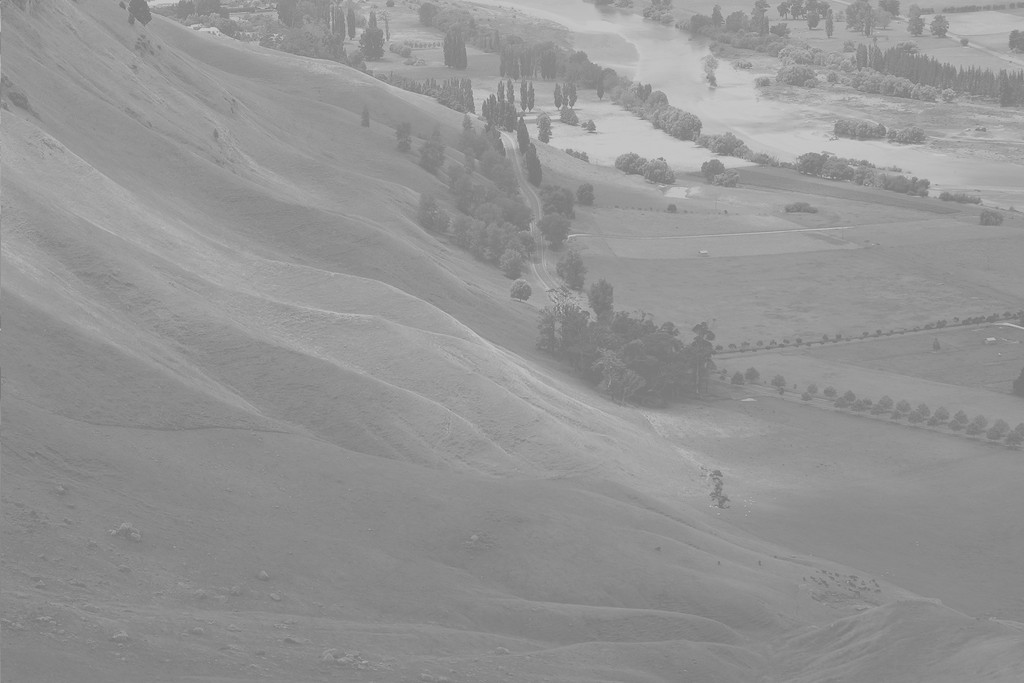

In [ ]:
show(gray_img)

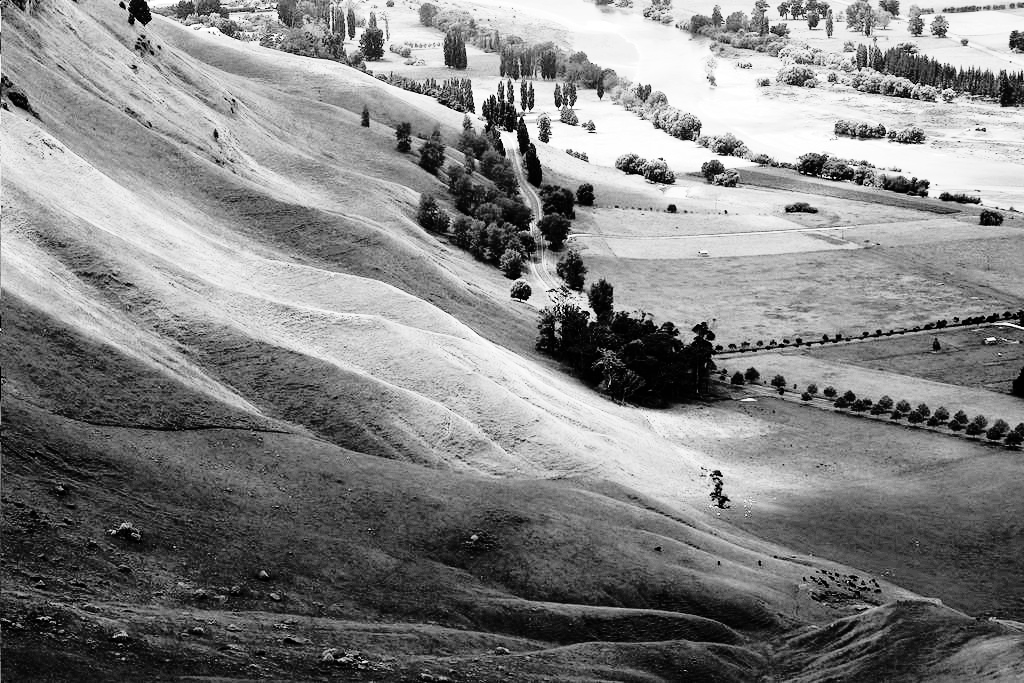

In [ ]:
show(output_img)

(array([  887.,  2806.,  2157.,  2719.,  3263.,     0.,  4034.,     0.,
         5110.,     0.,  6396.,     0.,     0.,  8452.,     0.,     0.,
            0., 10623.,     0.,     0.,     0.,     0., 13509.,     0.,
            0.,     0.,     0.,     0., 16151.,     0.,     0.,     0.,
            0.,     0.,     0., 19091.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 22195.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 25711.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 28693.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 28332.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 25766.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 24366.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 23564.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 21782.,     0.,     0., 

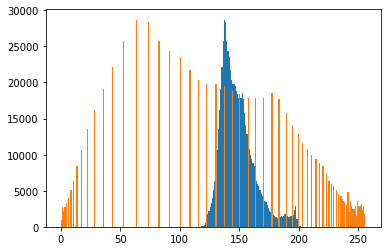

In [ ]:
plt.hist(gray_img.ravel(),256,[0,256])
plt.hist(output_img.ravel(),256,[0,256])

In [ ]:
# Edge detection with Robert Kernel

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg

In [ ]:
gray_img = cv2.imread("/content/unequalized.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
kernel_robert = np.array([[-1,0],[0,1]])
print(kernel_robert)

[[-1  0]
 [ 0  1]]


In [ ]:
output_img = sg.convolve(gray_img,kernel_robert,"full")

In [ ]:
from google.colab.patches import cv2_imshow as show

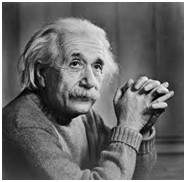

In [ ]:
show(gray_img)

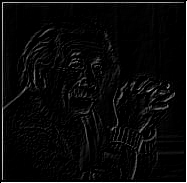

In [ ]:
show(output_img)

In [ ]:
kernel_prewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [ ]:
output_prewitt = sg.convolve(gray_img, kernel_prewitt,"full")

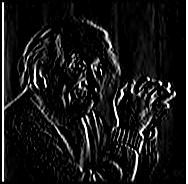

In [ ]:
show(output_prewitt)

In [ ]:
kernel_sobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

In [ ]:
output_sobel = sg.convolve(gray_img, kernel_sobel, "full")

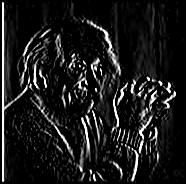

In [ ]:
show(output_sobel)

In [ ]:
kernel_sobel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(kernel_sobel_h)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [ ]:
output_sobel_h = sg.convolve(gray_img, kernel_sobel_h,"full")


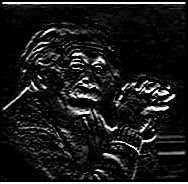

In [ ]:
show(output_sobel_h)
# print(output_sobel_h.shape)

In [ ]:
kernel_modified = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [ ]:
output_modified = sg.convolve(gray_img, kernel_modified, "full")

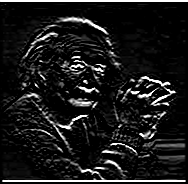

In [ ]:
show(output_modified)

In [ ]:
kernel_blur_gaussian = (np.array([[1,2,1],[2,4,2],[1,2,1]]))*(1/16)

In [ ]:
print(kernel_blur_gaussian)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [ ]:
output_blur = sg.convolve(gray_img, kernel_blur_gaussian, "full")

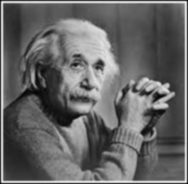

In [ ]:
show(output_blur)